# Matrix Plots

Matrix plots create color-coded matrices that are useful for visually detecting clusters within data. In order to make sense, matrix plots require a dataset where both row and column ordering are meaningful.

## Set things up.

In [26]:
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

display(tips.head(), flights.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## `sns.heatmap()`

I need my data to be a well-ordered matrix in order for this to work. A correlational matrix is a sloppy-looking way to make that possible.

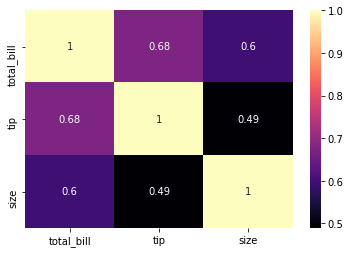

In [22]:
sns.heatmap(tips.corr(),
            cmap='magma',
            annot=True)

The flights dataset provides a better example. I can use a pivot table to create a matrix where the rows are months, the column years, and the values the number of passengers.

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


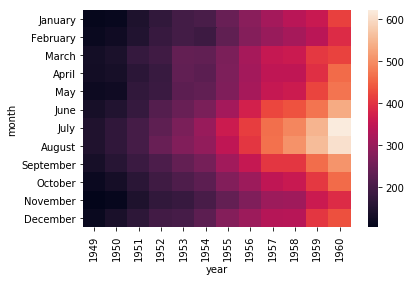

In [23]:
f_pivot = flights.pivot_table(index='month',
                              columns='year',
                              values='passengers')
display(f_pivot.head())
sns.heatmap(f_pivot)

It is clear from the heatmap that over time the summer months became by far the most popular time to take flights, likely due to vacations. I wish I got to take more vacations. It's not like I'm going to look back over my life while I lie on my deathbed and find myself thankful that I spent so much time working.

## `sns.clustermap()`

Seaborn's clustermap uses hierarchial clustering to shift around rows and columns and further highlight differences in regions of data. I'll get deeper into clustering algorithms in the machine learning sections.

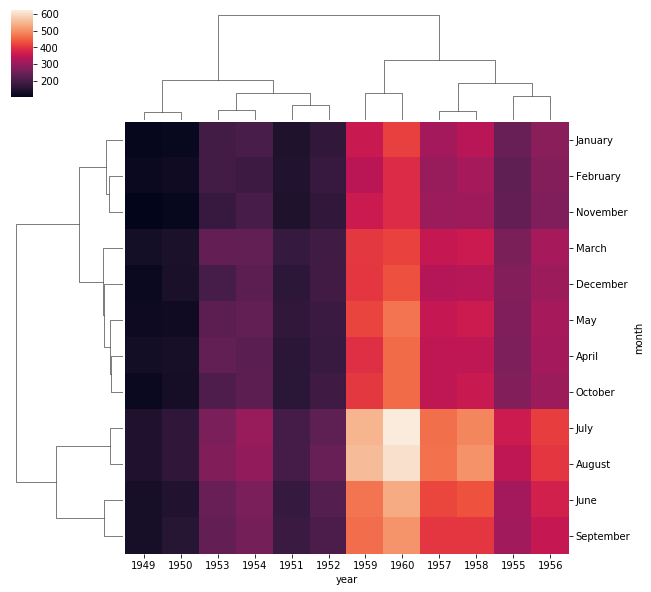

In [24]:
sns.clustermap(f_pivot)

The information is now out of order, but the regions of particularly high activity are now more visible.

Fitting the the data to a standard scale is also possible.

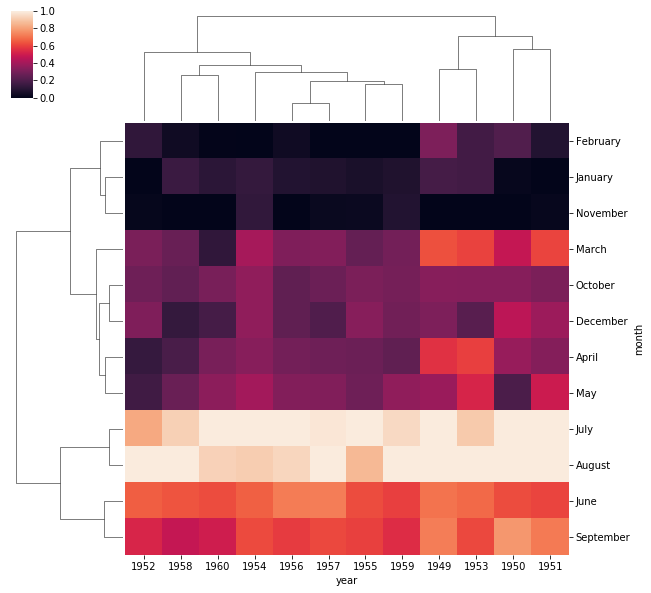

In [25]:
sns.clustermap(f_pivot, standard_scale=1)

## Exploration

In [47]:
iris = sns.load_dataset('iris')
display(iris.info())
display(iris.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


None

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


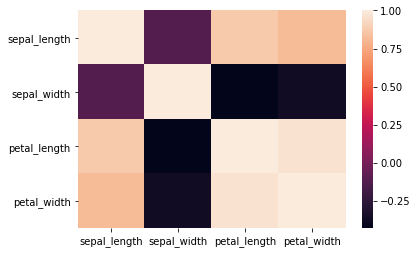

In [50]:
sns.heatmap(iris.corr())